# Support Vector Machines

Elif Cansu YILDIZ  

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Support-Vector-Machines" data-toc-modified-id="Support-Vector-Machines-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Support Vector Machines</a></span><ul class="toc-item"><li><span><a href="#Load-Dataset" data-toc-modified-id="Load-Dataset-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load Dataset</a></span></li><li><span><a href="#Scale-Dataset" data-toc-modified-id="Scale-Dataset-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Scale Dataset</a></span></li><li><span><a href="#Example-SVM-Code-with-RBF-Kernel" data-toc-modified-id="Example-SVM-Code-with-RBF-Kernel-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Example SVM Code with RBF Kernel</a></span></li><li><span><a href="#Functionize-SVM-Scenarios" data-toc-modified-id="Functionize-SVM-Scenarios-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Functionize SVM Scenarios</a></span></li><li><span><a href="#Analyzing-Assignment-51-Dataset" data-toc-modified-id="Analyzing-Assignment-51-Dataset-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Analyzing Assignment 51 Dataset</a></span></li><li><span><a href="#Analyzing-PA-E_t2" data-toc-modified-id="Analyzing-PA-E_t2-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Analyzing PA-E_t2</a></span></li><li><span><a href="#Analyzing-PA-E_t3" data-toc-modified-id="Analyzing-PA-E_t3-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Analyzing PA-E_t3</a></span></li><li><span><a href="#Analyzing-PA-E_t4" data-toc-modified-id="Analyzing-PA-E_t4-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Analyzing PA-E_t4</a></span></li><li><span><a href="#Analyzing-PA-E_t5" data-toc-modified-id="Analyzing-PA-E_t5-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Analyzing PA-E_t5</a></span></li><li><span><a href="#Analyzing-PA-E_t6" data-toc-modified-id="Analyzing-PA-E_t6-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Analyzing PA-E_t6</a></span></li><li><span><a href="#Analyzing-PA-E_t7" data-toc-modified-id="Analyzing-PA-E_t7-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>Analyzing PA-E_t7</a></span></li><li><span><a href="#Set-the-parameters-by-cross-validation" data-toc-modified-id="Set-the-parameters-by-cross-validation-1.12"><span class="toc-item-num">1.12&nbsp;&nbsp;</span>Set the parameters by cross-validation</a></span></li></ul></li></ul></div>

## Load Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

def load_dataset(filename):
    f = open(filename, "r")
    dataset = []
    skip_first = True
    for l in f:
        if skip_first:
            skip_first = False
            continue
        txt = l.strip()
        a,b,c = txt.split(" ")
        b = b.split(":")[1]
        c = c.split(":")[1]
        dataset.append( [a,b,c] )

    dataset = np.array(dataset, dtype=np.float)
    dataset_x = dataset[:, 1:]
    dataset_y = dataset[:, 0]
    return dataset_x, dataset_y

# Datasets
dataset2_x, dataset2_y = load_dataset("data/PA-E_t2.txt")
dataset3_x, dataset3_y = load_dataset("data/PA-E_t3.txt")
dataset4_x, dataset4_y = load_dataset("data/PA-E_t4.txt")
dataset5_x, dataset5_y = load_dataset("data/PA-E_t5.txt")
dataset6_x, dataset6_y = load_dataset("data/PA-E_t6.txt")
dataset7_x, dataset7_y = load_dataset("data/PA-E_t7.txt")

# Dataset
dataset51_x = np.array([[0, 3], [1, 3], [1, 2], [2, 2], [2, 4], [5, 8], [0, -3], [1, -3], [1, -2], [2, -4], [3, 1], [3, 0], [3, -2], [4, -1], [5, 1]])
dataset51_y = np.array([-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,1,1])

## Scale Dataset

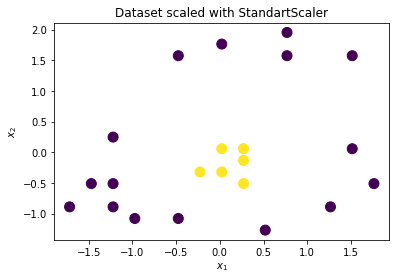

In [2]:
# Scale dataset to mean=0 variance=1
scaler2 = StandardScaler()
dataset2_x_scaled = scaler2.fit_transform(dataset2_x)

scaler3 = StandardScaler()
dataset3_x_scaled = scaler3.fit_transform(dataset3_x)

scaler4 = StandardScaler()
dataset4_x_scaled = scaler4.fit_transform(dataset4_x)

scaler5 = StandardScaler()
dataset5_x_scaled = scaler5.fit_transform(dataset5_x)

scaler6 = StandardScaler()
dataset6_x_scaled = scaler6.fit_transform(dataset6_x)

scaler7 = StandardScaler()
dataset7_x_scaled = scaler7.fit_transform(dataset7_x)

scaler51 = StandardScaler()
dataset51_x_scaled = scaler51.fit_transform(dataset51_x)

_=plt.scatter(dataset7_x_scaled[:,0], dataset7_x_scaled[:,1], s=100, c=dataset7_y)
_=plt.xlabel("$x_1$")
_=plt.ylabel("$x_2$")
_=plt.title("Dataset scaled with StandartScaler")

## Example SVM Code with RBF Kernel

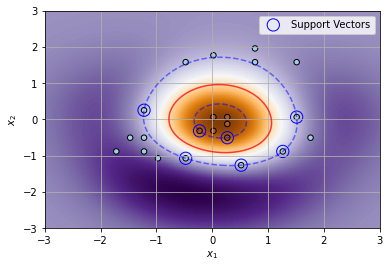

In [3]:
# Fit the model
clf = svm.SVC(kernel='rbf', C=10000)
clf.fit(dataset7_x_scaled, dataset7_y)

# Prepare the figure
plt.grid(True)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# Plot the decision function for each datapoint on the grid
xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                    np.linspace(-3, 3, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot model output for every pixel on the figure
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto', origin='lower', cmap=plt.cm.PuOr_r)

# Plot decision boundary
plt.contour(xx, yy, Z, colors='r', levels=[0], alpha=0.75,
           linestyles=['-'])
plt.contour(xx, yy, Z, colors='b', levels=[-1, 1], alpha=0.5,
           linestyles=['--', '--'])

# Plot support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=150,
           linewidth=1, facecolors='none', edgecolors='b', label="Support Vectors")

# Plot dataset
_=plt.scatter(dataset7_x_scaled[:, 0], dataset7_x_scaled[:, 1], s=30, c=dataset7_y, cmap=plt.cm.Paired, edgecolors='k')
_=plt.legend()

## Functionize SVM Scenarios

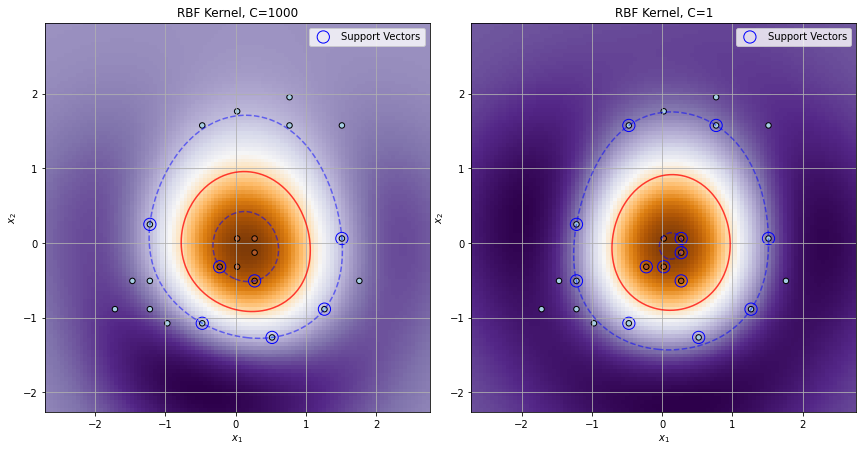

In [4]:
def svm_scenario(ax, x, y, zoom, kernel, C, title=None):
    # Fit the model
    clf = svm.SVC(kernel=kernel, C=C)
    clf.fit(x, y)

    # Plot results
    if ax is not None:
        # Prepare the figure
        ax.grid(True)
        ax.set_xlabel("$x_1$")
        ax.set_ylabel("$x_2$")
        if title is not None:
            ax.set_title(title)

        # Plot the decision function for each datapoint on the grid
        xlim = [np.min(x[:,0])-zoom ,np.max(x[:,0])+zoom]
        ylim = [np.min(x[:,1])-zoom ,np.max(x[:,1])+zoom]
        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                            np.linspace(ylim[0], ylim[1], 100))
        zz = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        zz = zz.reshape(xx.shape)

        # Plot model output for every pixel on the figure
        ax.imshow(zz, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto', origin='lower', cmap=plt.cm.PuOr_r)

        # Plot decision boundary
        ax.contour(xx, yy, zz, colors='r', levels=[0], alpha=0.75, linestyles=['-'])
        ax.contour(xx, yy, zz, colors='b', levels=[-1, 1], alpha=0.5, linestyles=['--', '--'])

        # Plot support vectors
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=150, linewidth=1, facecolors='none', edgecolors='b', label="Support Vectors")

        # Plot dataset
        ax.scatter(x[:, 0], x[:, 1], s=30, c=y, cmap=plt.cm.Paired, edgecolors='k')
        ax.legend()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
fig.tight_layout()
svm_scenario(ax=ax1, x=dataset7_x_scaled, y=dataset7_y, zoom=1, kernel='rbf', C=1000, title="RBF Kernel, C=1000")
svm_scenario(ax=ax2, x=dataset7_x_scaled, y=dataset7_y, zoom=1, kernel='rbf', C=1, title="RBF Kernel, C=1")

## Analyzing Assignment 51 Dataset

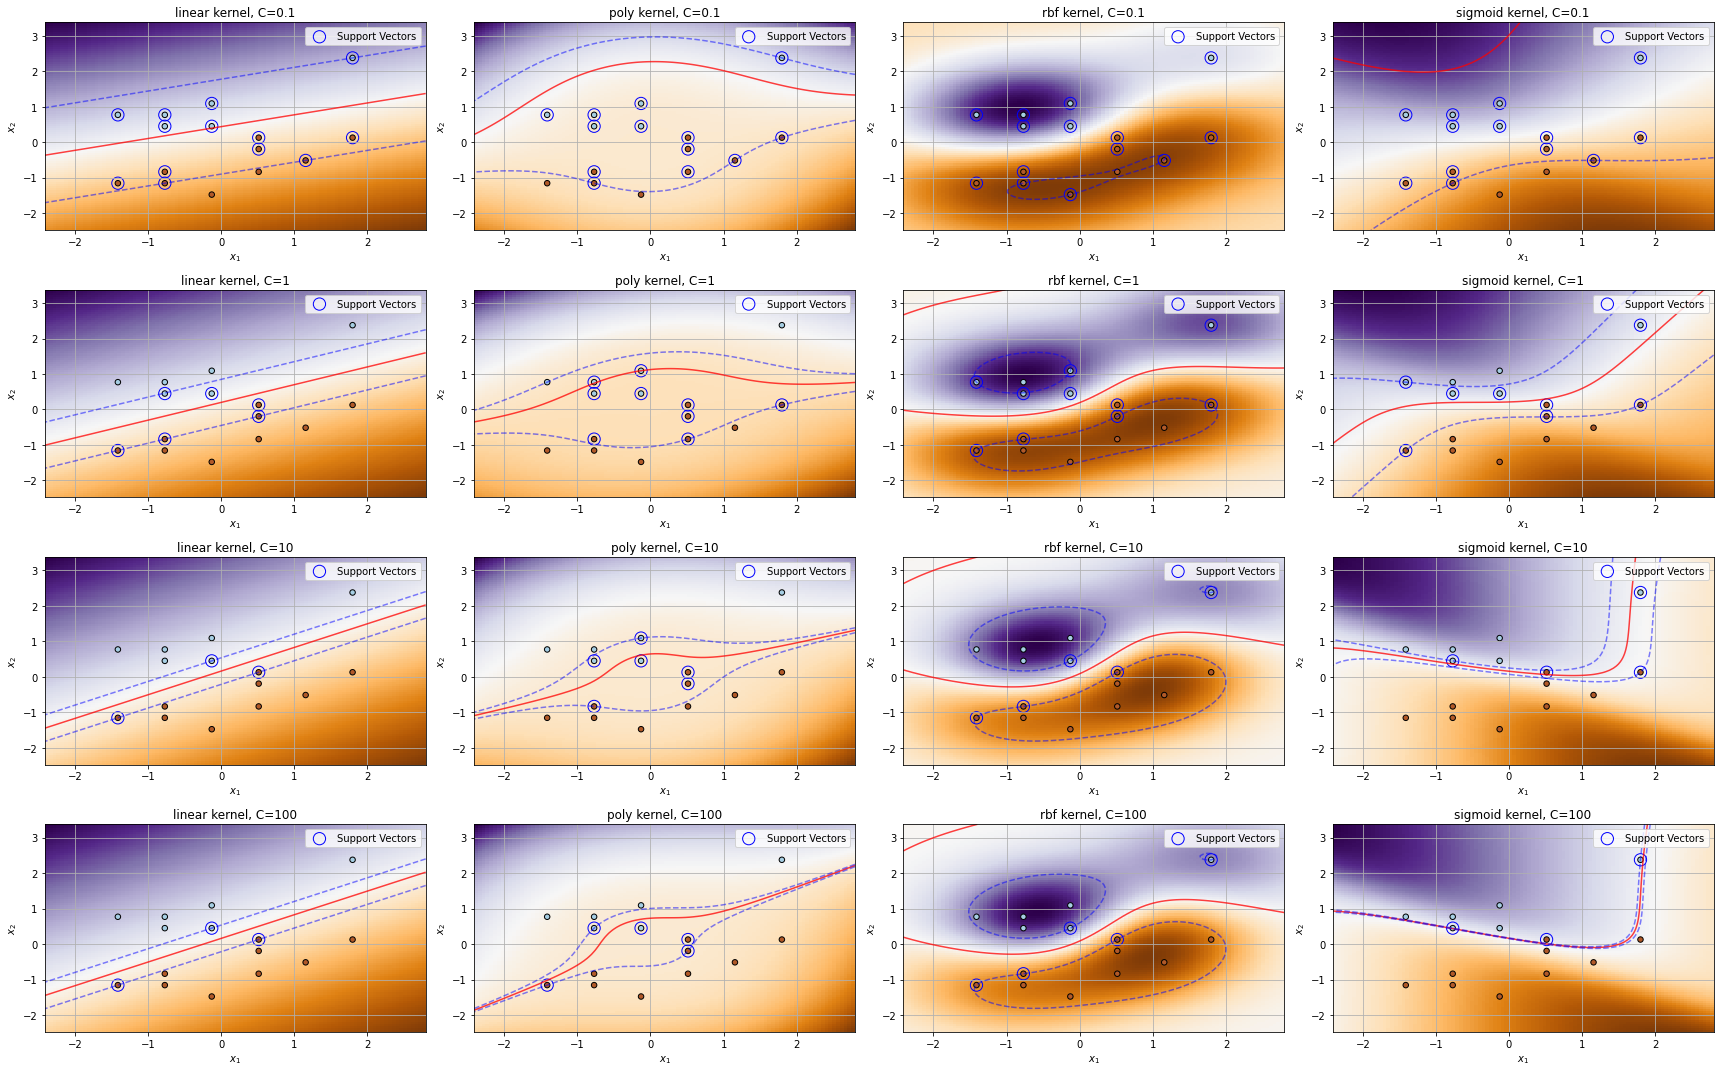

In [5]:
kernels=["linear", "poly", "rbf", "sigmoid"]
c_values = [0.1, 1, 10, 100] # Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

fig, axs = plt.subplots(len(c_values), len(kernels), figsize=(24,15))

for i,k in enumerate(kernels):
    for j,c in enumerate(c_values):
        svm_scenario(ax=axs[j,i], x=dataset51_x_scaled, y=dataset51_y, zoom=1, kernel=k, C=c, title=k+" kernel, C="+str(c))

fig.tight_layout()

## Analyzing PA-E_t2

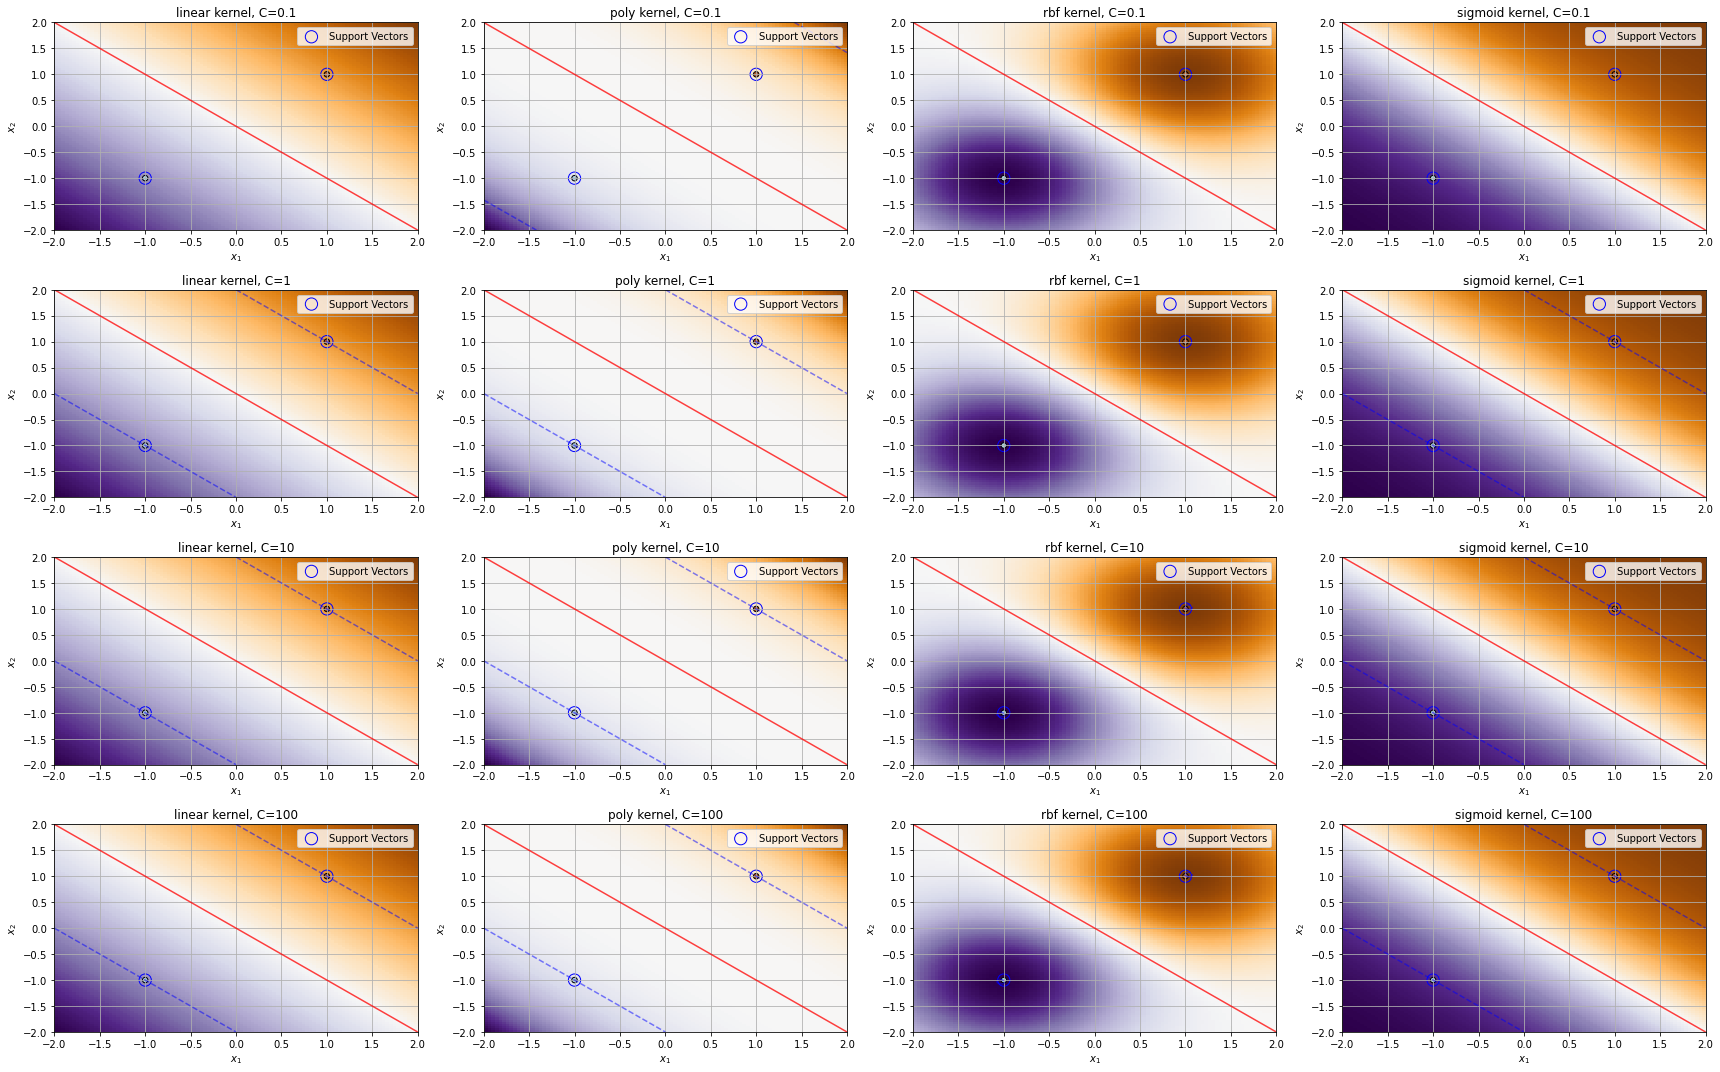

In [6]:
kernels=["linear", "poly", "rbf", "sigmoid"]
c_values = [0.1, 1, 10, 100] # Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

fig, axs = plt.subplots(len(c_values), len(kernels), figsize=(24,15))

for i,k in enumerate(kernels):
    for j,c in enumerate(c_values):
        svm_scenario(ax=axs[j,i], x=dataset2_x_scaled, y=dataset2_y, zoom=1, kernel=k, C=c, title=k+" kernel, C="+str(c))

fig.tight_layout()

## Analyzing PA-E_t3

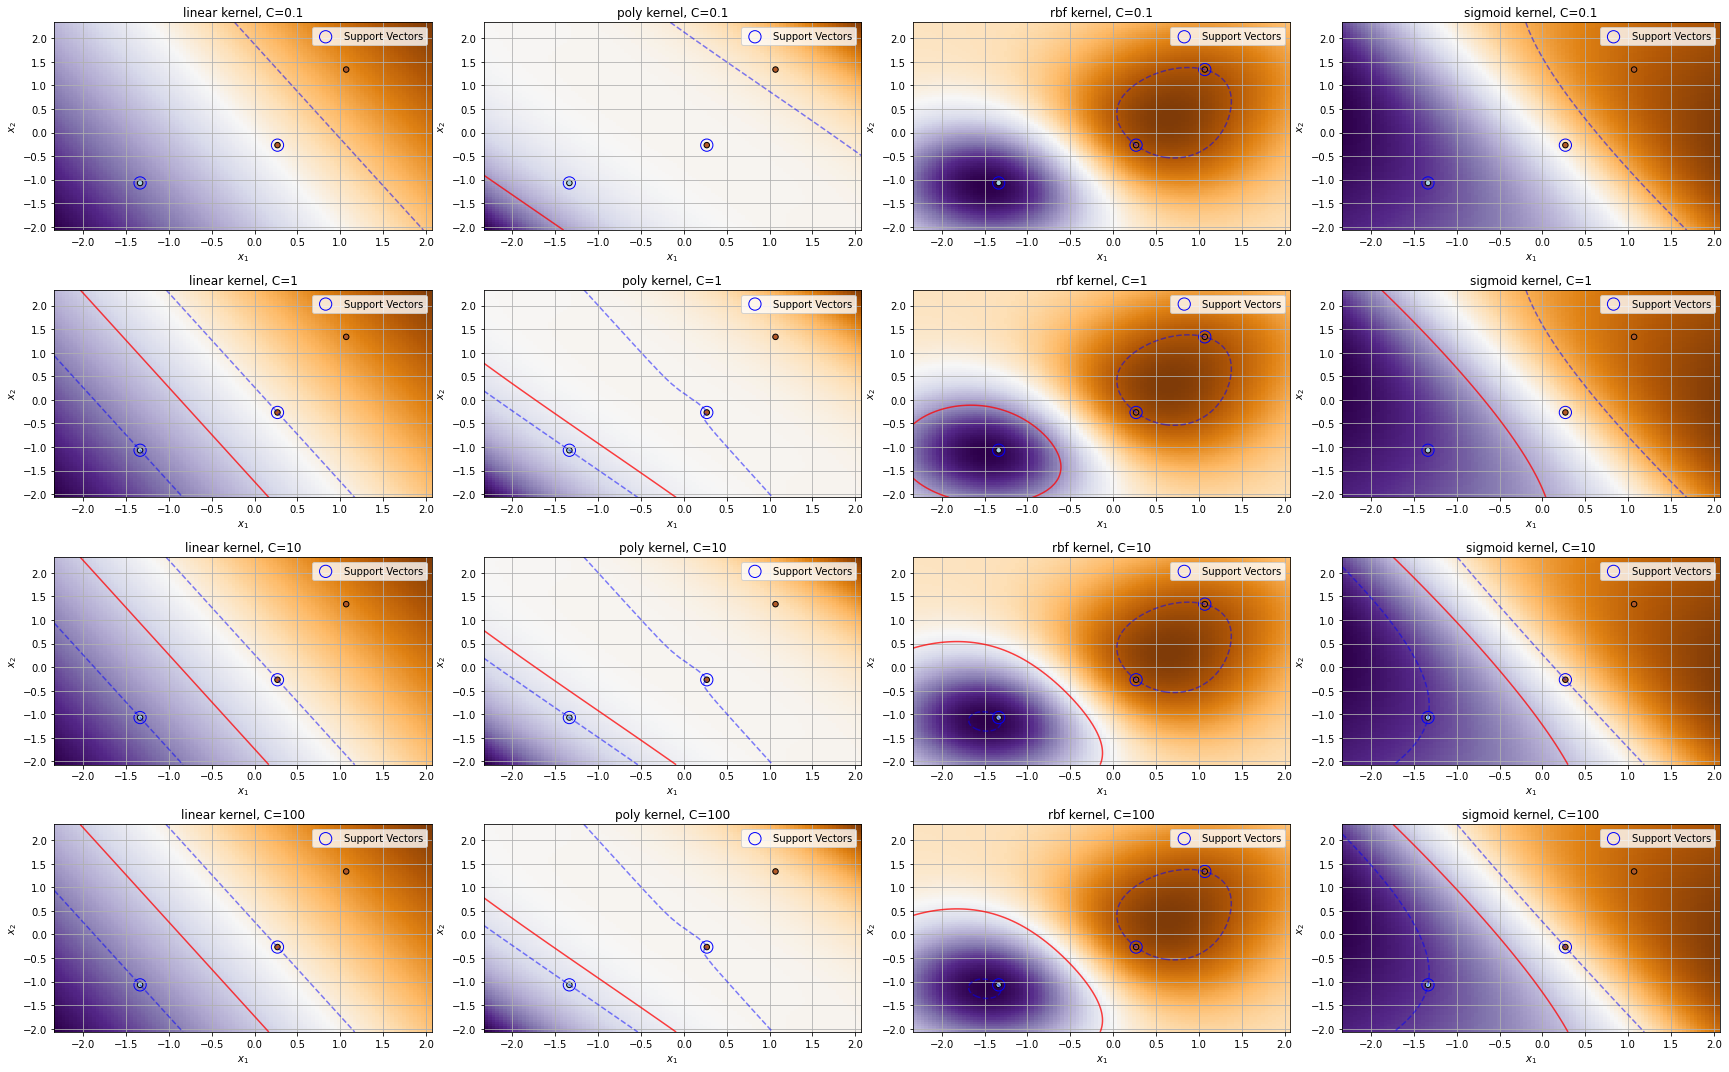

In [7]:
kernels=["linear", "poly", "rbf", "sigmoid"]
c_values = [0.1, 1, 10, 100] # Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

fig, axs = plt.subplots(len(c_values), len(kernels), figsize=(24,15))

for i,k in enumerate(kernels):
    for j,c in enumerate(c_values):
        svm_scenario(ax=axs[j,i], x=dataset3_x_scaled, y=dataset3_y, zoom=1, kernel=k, C=c, title=k+" kernel, C="+str(c))

fig.tight_layout()

## Analyzing PA-E_t4

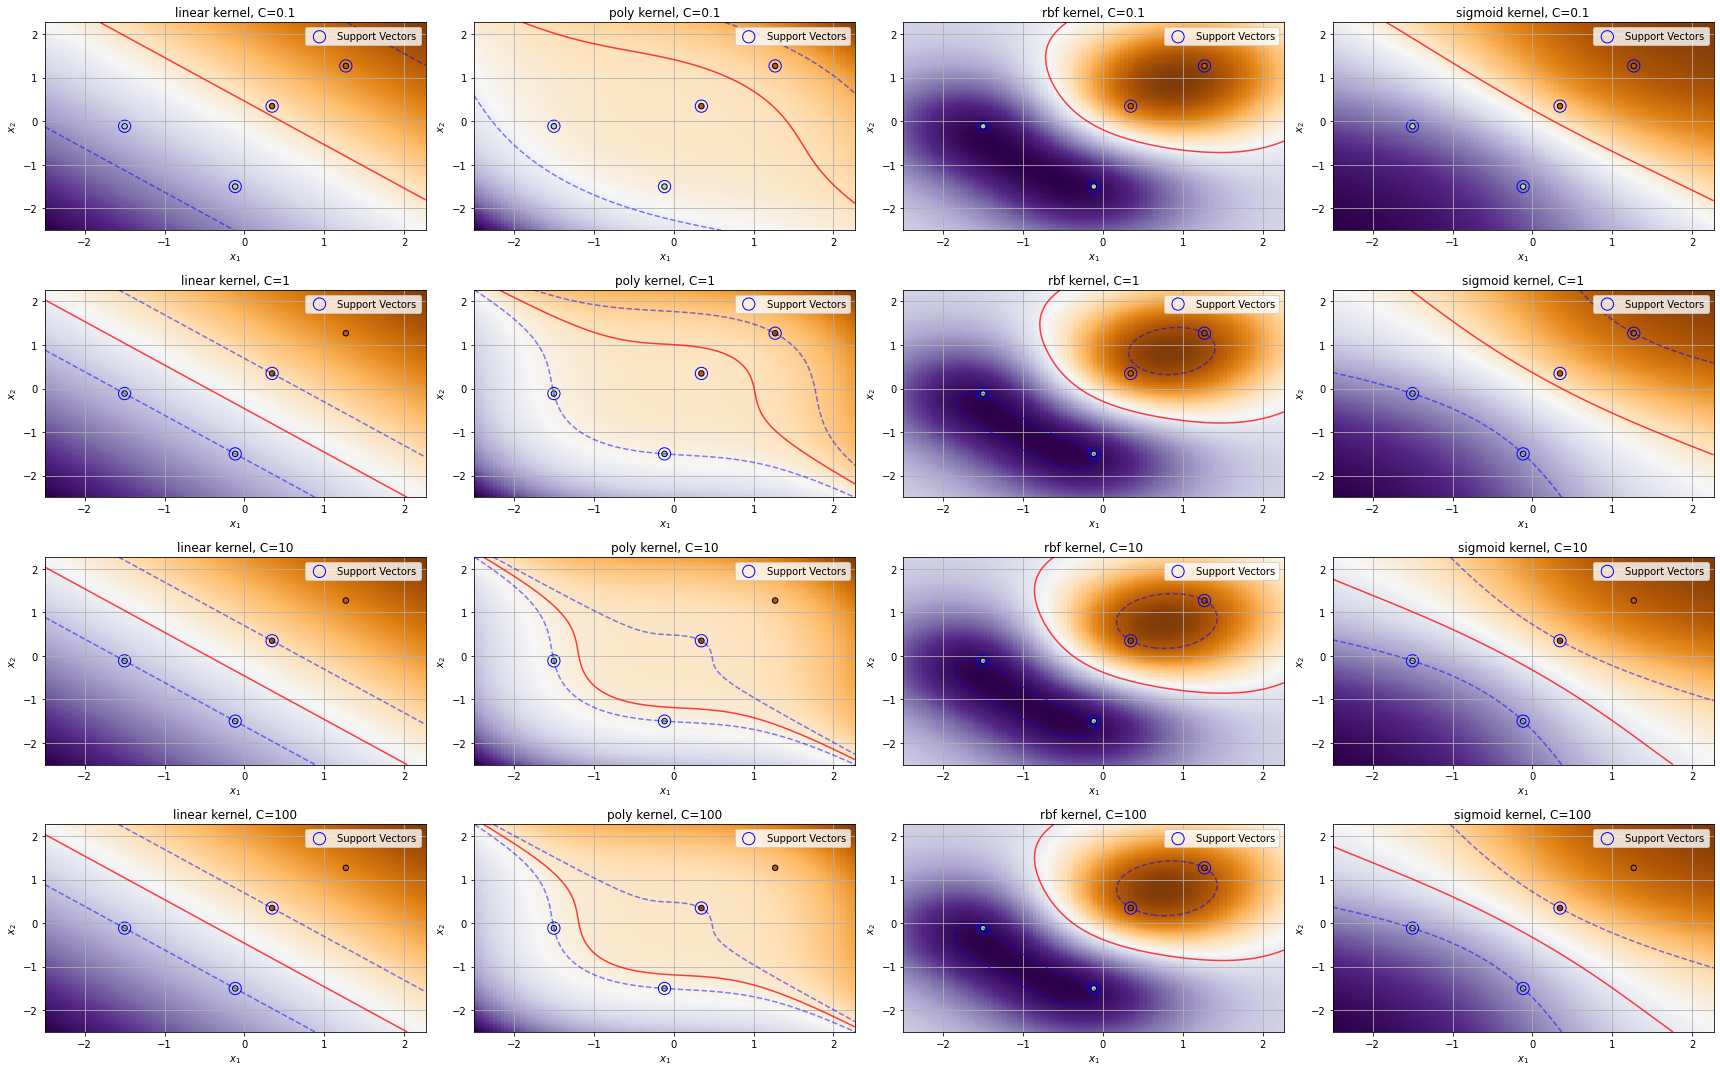

In [8]:
kernels=["linear", "poly", "rbf", "sigmoid"]
c_values = [0.1, 1, 10, 100] # Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

fig, axs = plt.subplots(len(c_values), len(kernels), figsize=(24,15))

for i,k in enumerate(kernels):
    for j,c in enumerate(c_values):
        svm_scenario(ax=axs[j,i], x=dataset4_x_scaled, y=dataset4_y, zoom=1, kernel=k, C=c, title=k+" kernel, C="+str(c))

fig.tight_layout()

## Analyzing PA-E_t5

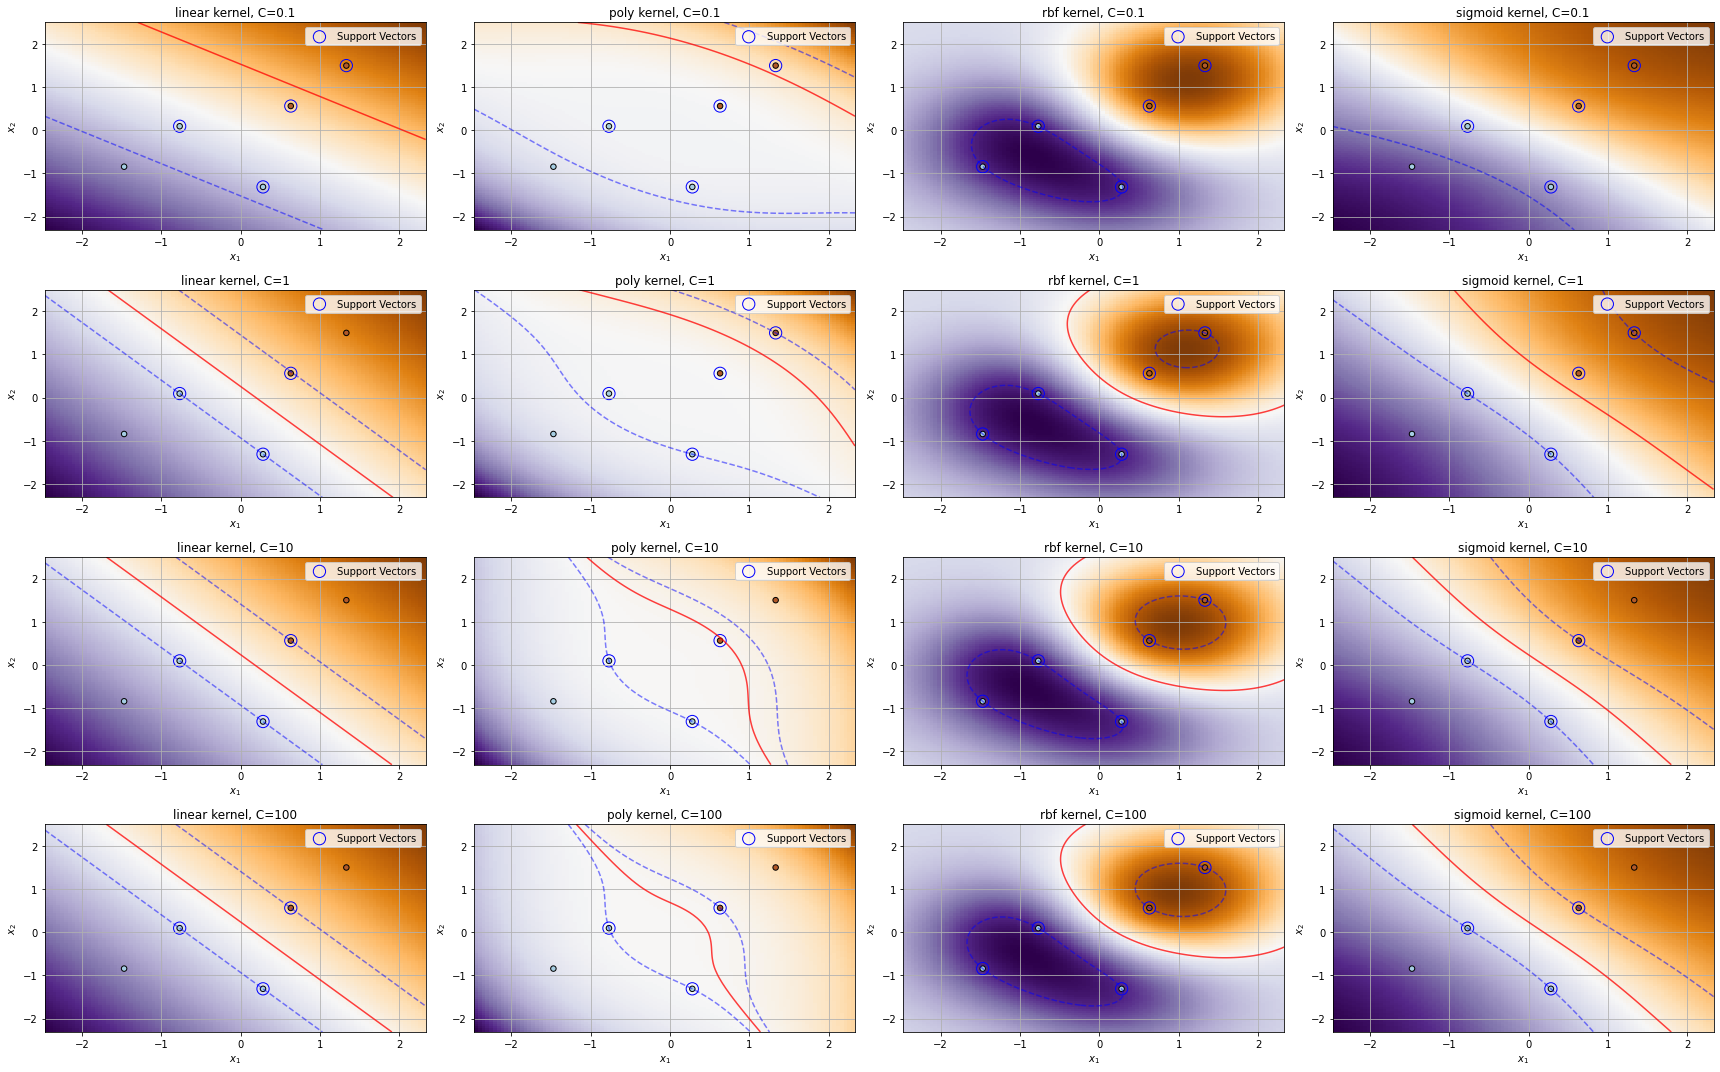

In [9]:
kernels=["linear", "poly", "rbf", "sigmoid"]
c_values = [0.1, 1, 10, 100] # Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

fig, axs = plt.subplots(len(c_values), len(kernels), figsize=(24,15))

for i,k in enumerate(kernels):
    for j,c in enumerate(c_values):
        svm_scenario(ax=axs[j,i], x=dataset5_x_scaled, y=dataset5_y, zoom=1, kernel=k, C=c, title=k+" kernel, C="+str(c))

fig.tight_layout()

## Analyzing PA-E_t6

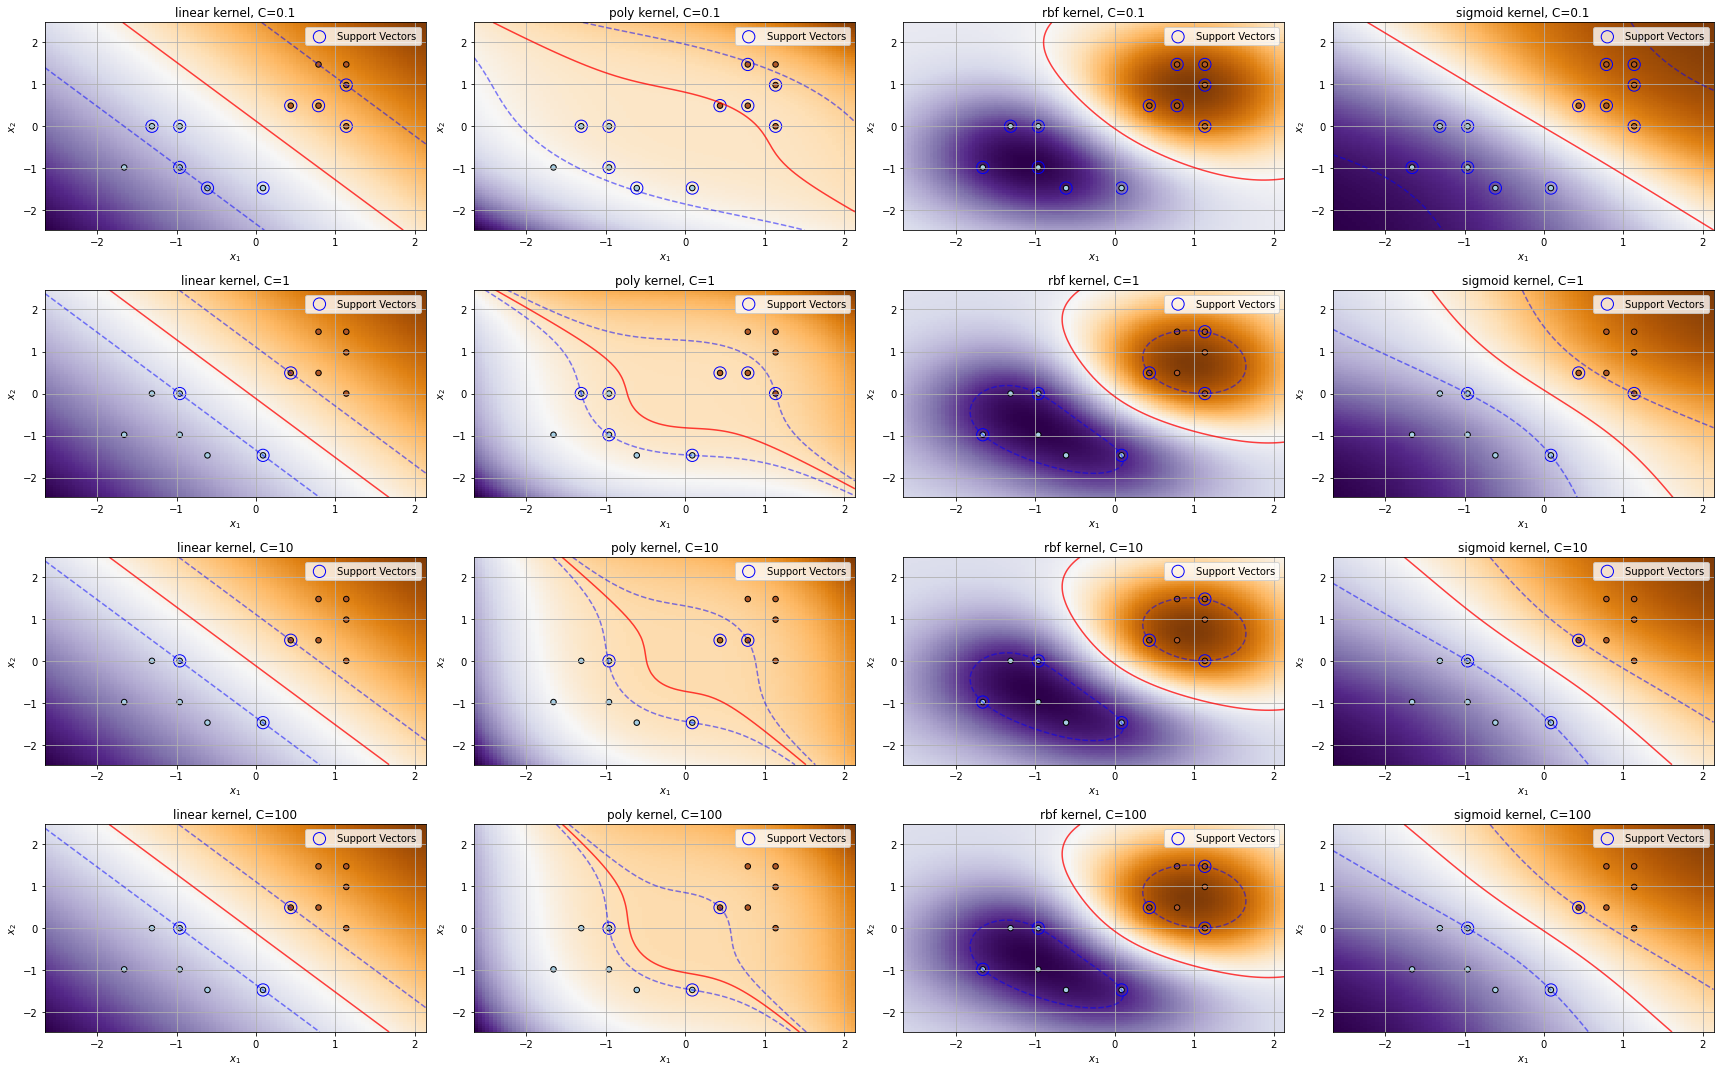

In [10]:
kernels=["linear", "poly", "rbf", "sigmoid"]
c_values = [0.1, 1, 10, 100] # Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

fig, axs = plt.subplots(len(c_values), len(kernels), figsize=(24,15))

for i,k in enumerate(kernels):
    for j,c in enumerate(c_values):
        svm_scenario(ax=axs[j,i], x=dataset6_x_scaled, y=dataset6_y, zoom=1, kernel=k, C=c, title=k+" kernel, C="+str(c))

fig.tight_layout()

## Analyzing PA-E_t7

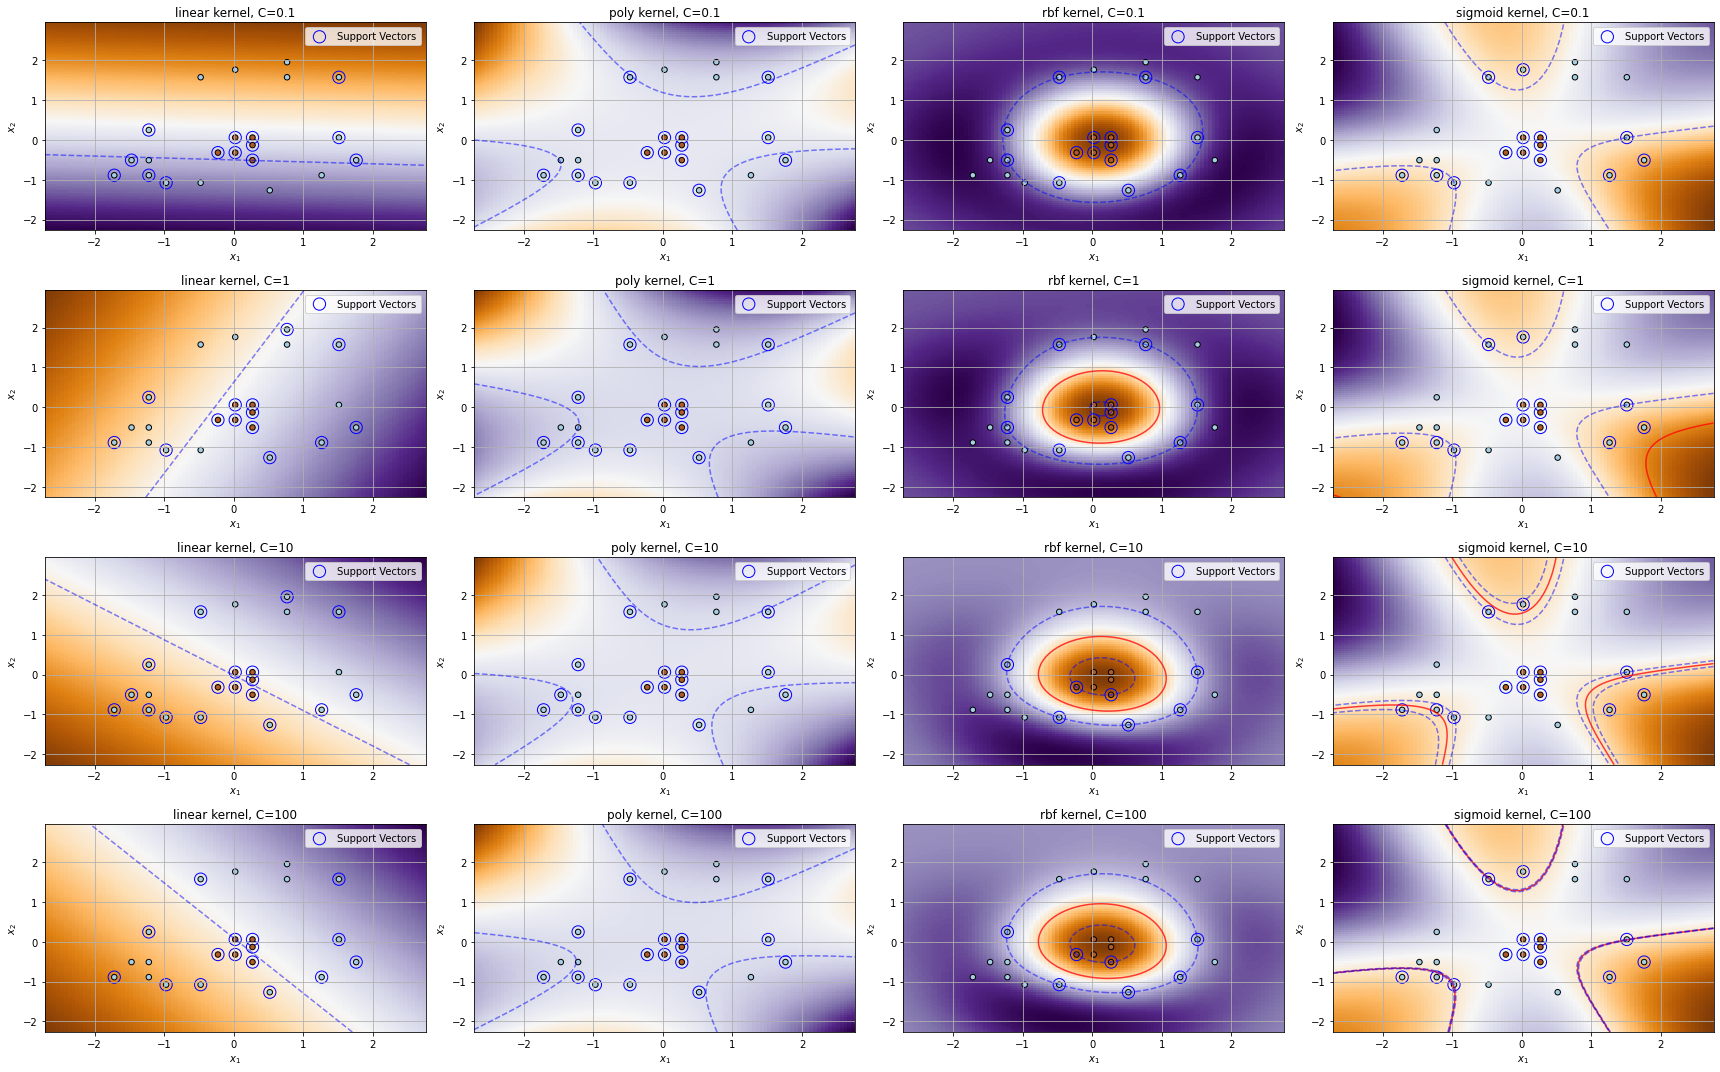

In [11]:
kernels=["linear", "poly", "rbf", "sigmoid"]
c_values = [0.1, 1, 10, 100] # Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

fig, axs = plt.subplots(len(c_values), len(kernels), figsize=(24,15))

for i,k in enumerate(kernels):
    for j,c in enumerate(c_values):
        svm_scenario(ax=axs[j,i], x=dataset7_x_scaled, y=dataset7_y, zoom=1, kernel=k, C=c, title=k+" kernel, C="+str(c))

fig.tight_layout()

Mostly linear and rbf kernels worked well with all the data. Even tough C value is default 1, higher values seem to work better.

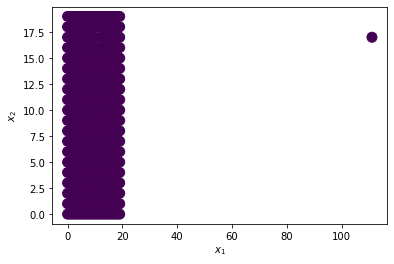

In [13]:
datasetTest_x, datasetTest_y = load_dataset("data/PA-E_Test.txt")

_=plt.scatter(datasetTest_x[:,0], datasetTest_x[:,1], s=100, c=datasetTest_y)
_=plt.xlabel("$x_1$")
_=plt.ylabel("$x_2$")

## Set the parameters by cross-validation

In [15]:
X, Y = load_dataset("data/PA-E_t7.txt")

C_values = 10**np.linspace(-3, 3, 14)
G_values = 10**np.linspace(-3, 3, 7)

tuned_parameters = [{'kernel': ['rbf'],     'C': C_values, 'gamma': G_values},
                    {'kernel': ['linear'],  'C': C_values},
                    {'kernel': ['poly'],    'C': C_values},
                    {'kernel': ['sigmoid'], 'C': C_values}]
scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X, Y)

    print("Best parameters set found on development set:")
    print(clf.best_params_)
    #print("Grid scores on development set:")
    #print()
    #means = clf.cv_results_['mean_test_score']
    #stds = clf.cv_results_['std_test_score']
    #for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    #    print("%0.3f (+/-%0.03f) for %r"
    #          % (mean, std * 2, params))
    #print()


# Tuning hyper-parameters for precision
Best parameters set found on development set:
{'C': 0.5878016072274912, 'gamma': 0.1, 'kernel': 'rbf'}
# Tuning hyper-parameters for recall
Best parameters set found on development set:
{'C': 0.5878016072274912, 'gamma': 0.1, 'kernel': 'rbf'}


Used: https://scikit-learn.org/stable/modules/svm.html